# **Trabalho 1 - Reconhecimento de Padrões**
##### Renan Henrique Cardoso - 379013

In [ ]:
import math
import numpy as np                         # Utilizado
from scipy import io                       # Utilizado somente a função loadmat para carregar arquivo .mat 
import seaborn as sns                      # Plotagem dos gráficos
import pandas as pd                        # Utilizado para converter o .mat e trabalhar com dataframe
pd.options.mode.chained_assignment = None  # default='warn'

### **Upload dos arquivos .mat**

In [ ]:
# !curl -o Classe1.mat --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://github.com/cardosorrenan/reconhecimentopadroes-ufc/blob/master/Classe1.mat?raw=true
# !curl -o Classe2.mat --remote-name -H 'Accept: application/vnd.github.v3.raw' --location https://github.com/cardosorrenan/reconhecimentopadroes-ufc/blob/master/Classe2.mat?raw=true

### **Plot exemplo de sinal ECG**

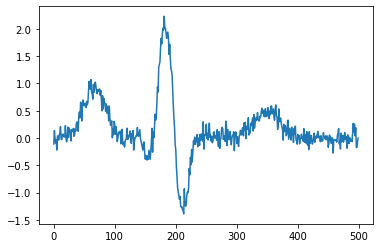

In [ ]:
ecgs = io.loadmat('Classe1.mat')['Classe1']  # Carrega para 'ecgs' o arquivo Classe1.mat
ecgs = pd.DataFrame(ecgs)                    # Transforma do formato dicionário para dataframe
sns.lineplot(data=ecgs[49])                  # Exibe o sinal exemplo 50

### **Plot exemplo de sinal de ruído**

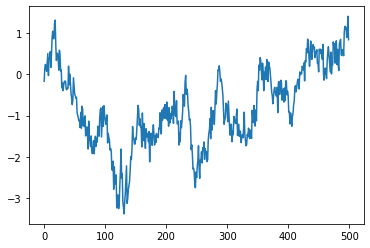

In [ ]:
noises = io.loadmat('Classe2.mat')['Classe2']  
noises = pd.DataFrame(noises)                 
sns.lineplot(data=noises[13])                  

### **Características dos sinais elegidas**:
  - **Média**
  - **Mediana**
  - **Variância**
  - **Curtose** (Kurtosis): Medida de forma que caracteriza o achatamento da curva da função de distribuição de probabilidade
  - **Assimetria** (Skewness): Medida da assimetria da distribuição de probabilidade de uma variável aleatória com valor real sobre sua média

### **Definindo vetor de características para os sinais de ECG**

In [ ]:
ecg_vector = pd.DataFrame()                           # Instancia um novo DataFrame
ecg_vector['mean'] = ecgs.mean()                      # Calcula a média de cada sinal ecg
ecg_vector['median'] = ecgs.median()                  # Calcula a mediana de cada sinal ecg
ecg_vector['variance'] = ecgs.var()                   # Calcula a variância de cada sinal ecg
ecg_vector['kurtosis'] = ecgs.kurtosis()              # Calcula a curtose de cada sinal ecg
ecg_vector['skewness'] = ecgs.skew()                  # Calcula a assimetria de cada sinal ecg
ecg_vector['class'] = pd.DataFrame(data=[0]*50)       # Definindo a classe dos sinais ecg: 0
print('ecg_vector', ecg_vector.shape)                 # Exibe dimensão do dataframe
ecg_vector.head()                                     # Exibe 5 amostras de sinais ecg

ecg_vector (50, 6)


,mean,median,variance,kurtosis,skewness,class
0,0.054555,0.029564,0.044934,7.342880,0.712121,0
1,0.219775,0.121604,0.772401,7.525372,0.524423,0
2,0.006182,0.003271,0.000600,7.949215,0.598263,0
3,0.175649,0.092538,0.429686,7.802710,0.710876,0
4,0.249563,0.147590,0.927059,7.554545,0.695768,0


### **Definindo vetor de características para os sinais de ruído**

In [ ]:
noise_vector = pd.DataFrame()
noise_vector['mean'] = noises.mean()
noise_vector['median'] = noises.median()
noise_vector['variance'] = noises.var()
noise_vector['kurtosis'] = noises.kurtosis()
noise_vector['skewness'] = noises.skew()
noise_vector['class'] = pd.DataFrame(data=[1]*50)
print('noise_vector', noise_vector.shape)
noise_vector.head()

noise_vector (50, 6)


,mean,median,variance,kurtosis,skewness,class
0,0.002110,0.003533,0.000173,-1.013604,-0.308855,1
1,0.087184,0.171650,0.300552,-0.987618,-0.332647,1
2,0.154969,0.307802,1.159563,-0.964448,-0.344421,1
3,0.043552,0.089607,0.093389,-0.975847,-0.357878,1
4,0.026380,0.055927,0.027955,-0.976322,-0.330218,1


### **Definindo dataset**

In [ ]:
dataset = ecg_vector.append(noise_vector) # Concatena os dois vetores das classes
dataset = dataset.sample(frac=1)          # Embaralha as linhas
dataset = dataset.reset_index(drop=True)  # Reset dos índices criados nas células anteriores
print('dataset', dataset.shape)
dataset.head(10)                          # Exibe 10 amostras do nosso dataset

dataset (100, 6)


,mean,median,variance,kurtosis,skewness,class
0,0.159883,0.074005,0.321736,5.782528,0.871519,0
1,0.201710,0.364672,1.796968,-0.969529,-0.319647,1
2,-0.090854,0.013990,2.497942,-0.929820,-0.147724,1
3,0.006182,0.003271,0.000600,7.949215,0.598263,0
4,0.160785,0.076943,0.398100,7.312143,0.761182,0
5,0.039314,0.018013,0.022544,7.049048,0.535343,0
6,0.026380,0.055927,0.027955,-0.976322,-0.330218,1
7,0.191620,0.100409,0.448346,6.049378,0.631015,0
8,-0.120439,-0.132988,0.019767,-0.423563,-0.143834,1
9,0.205602,0.081862,0.406874,4.102831,0.879693,0


### **Criação dos Folds**

In [ ]:
dataset['fold'] = pd.DataFrame(data=[-1]*100)  # Todas as linhas da coluna 'fold' recebe -1, pois ainda não pertencem a nenhum fold

for fold in list(range(0, 100, 10)):           # Como K=10, cada linha pertencerá a um fold [0, 1, ..., 9] 
  dataset.loc[fold:fold+10, 'fold'] = fold/10  # 0-10 recebe 0 / 10-20 recebe 1 / ... / 90-100 recebe 9

dataset[45:55]                                 # Resultado: Linhas 48-52 do dataset

,mean,median,variance,kurtosis,skewness,class,fold
45,0.276407,0.123731,0.719361,4.162055,0.858285,0,4.0
46,-0.061187,0.062812,1.312846,-0.938962,-0.133550,1,4.0
47,-0.086708,0.018057,1.749159,-0.949314,-0.116325,1,4.0
48,-0.349710,-0.242982,1.782350,-0.389093,-0.262390,1,4.0
49,0.123165,0.062362,0.211706,6.697356,0.796105,0,4.0
50,0.242173,0.515203,2.879329,-0.955606,-0.357971,1,5.0
51,-0.446269,-0.401288,2.947574,-0.402734,-0.241264,1,5.0
52,0.228955,0.102507,0.802350,6.548693,0.749326,0,5.0
53,0.154969,0.307802,1.159563,-0.964448,-0.344421,1,5.0
54,-0.349091,-0.219303,1.794102,-0.389115,-0.207978,1,5.0


### **Algoritmo k-NN**

In [ ]:
k = 5

# Testando somente para o 0-Fold (preciso testar os 10)
training_data = dataset.query('fold != 0') # Total de 90 amostras
testing_data = dataset.query('fold == 0')  # Total de 10 amostras

In [ ]:
def getEuclidianDistance(point_a, point_b):
  d2_mean = pow(point_a['mean'] - point_b['mean'], 2)
  d2_median = pow(point_a['median'] - point_b['median'], 2)
  d2_variance = pow(point_a['variance'] - point_b['variance'], 2)
  d2_kurtosis = pow(point_a['kurtosis'] - point_b['kurtosis'], 2)
  d2_skewness = pow(point_a['skewness'] - point_b['skewness'], 2)
  sum = d2_mean + d2_median + d2_variance + d2_kurtosis + d2_skewness
  return round(math.sqrt(sum), 6)

In [ ]:
distances_df = pd.DataFrame()

for index1, point_test in testing_data.iterrows(): # A iteração será sobre a quantidade de testes 'testing_data': 10 amostras
  distances_column = pd.DataFrame()

  # O algoritmo criará uma tabela que exibe todas as distâncias dos 90 pontos dos dados de treinamento
  for index2, point_train in training_data.iterrows():  
    distances_column.concat(getEuclidianDistance(point_test, point_train)])
  print(distances_column)
  # distances_df = pd.concat([distances_df, distances_column], axis=1)


  # Estou perdendo a referencia do meu ponto de treinamento para depois verificar a classe dele

SyntaxError: ignored

In [ ]:
distances

,0,0,0,0,0,0,0,0,0,0
0,1.750683,8.688532,8.793455,0.471234,0.403882,0.455697,8.520637,1.493771,7.956117,3.419873
1,0.340614,7.261236,7.387468,1.939205,1.314146,1.051630,7.076387,0.314429,6.509680,1.946542
2,1.834920,8.601450,8.661848,0.916732,0.497089,0.912461,8.579343,1.515314,8.023663,3.460549
3,6.401084,1.932069,2.255125,8.491412,7.885003,7.598532,1.157844,6.634506,0.808483,4.788299
4,6.885589,1.818991,2.487284,8.990364,8.384958,8.088337,0.062697,7.121317,0.630102,5.248427
...,...,...,...,...,...,...,...,...,...,...
85,1.506379,8.490334,8.595240,0.718808,0.340240,0.336410,8.315251,1.286283,7.747173,3.182173
86,6.907529,1.844124,2.506109,9.008608,8.405472,8.106857,0.077151,7.142495,0.639860,5.272903
87,1.554939,5.562745,5.717898,3.755447,3.089241,2.870830,5.375389,1.853150,4.808348,0.176118
88,6.875481,1.147826,1.882838,9.002044,8.365914,8.100784,0.670764,7.096114,0.984319,5.230760
